<a href="https://colab.research.google.com/github/Englishson0909/S24Corpus-final/blob/main/RQ01(0625).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 RQ1 How different the frequency distribution of the adverb "very" differ between written and spoken texts?

In [1]:
pip install pandas requests

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


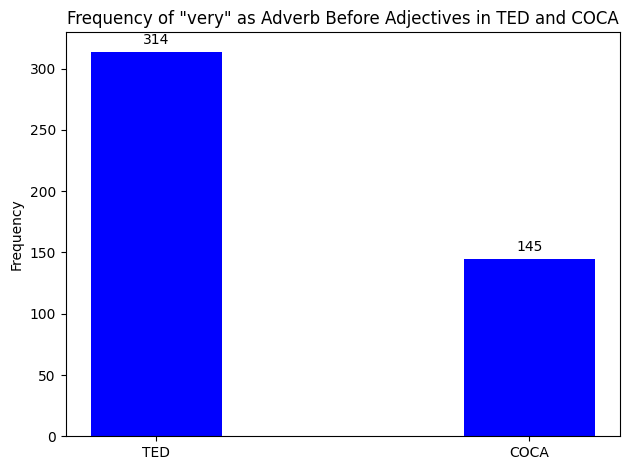

In [23]:
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk import pos_tag, word_tokenize

# Download NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

def download_csv(url):
    """Download a CSV file from a given URL and return it as a pandas DataFrame, with text converted to lowercase."""
    response = requests.get(url)
    if response.status_code == 200:
        csv_raw = StringIO(response.text)
        df = pd.read_csv(csv_raw)
        df = df.applymap(lambda s: s.lower() if type(s) is str else s)
        return df
    else:
        raise Exception(f"Failed to download CSV. Status code: {response.status_code}")

def count_pattern(df, word, first_tag, second_tag):
    """Count occurrences of a specified word followed by a word with a specific tag in a DataFrame."""
    total_count = 0
    for text in df.fillna('').astype(str).apply(lambda x: ' '.join(x), axis=1):
        tokens = word_tokenize(text)
        tagged = pos_tag(tokens)
        for i in range(len(tagged) - 1):
            if tagged[i][0] == word and tagged[i + 1][1] == second_tag:
                total_count += 1
    return total_count

# URLs of the CSV files
ted_csv_url = 'https://github.com/Englishson0909/S24Corpus-final/raw/main/TEDcleandata.csv'
coca_csv_url = 'https://github.com/Englishson0909/S24Corpus-final/raw/main/finalcocatext.csv'

try:
    df_ted = download_csv(ted_csv_url)
    df_coca = download_csv(coca_csv_url)

    # Count "very" as an adverb with adjectives
    very_with_adj_ted = count_pattern(df_ted, 'very', 'RB', 'JJ')
    very_with_adj_coca = count_pattern(df_coca, 'very', 'RB', 'JJ')

    # Data for plotting
    labels = ['TED', 'COCA']
    counts = [very_with_adj_ted, very_with_adj_coca]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x, counts, width, label='Very as Adverb', color='blue')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Frequency')
    ax.set_title('Frequency of "very" as Adverb Before Adjectives in TED and COCA')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)

    ax.bar_label(rects1, padding=3)

    fig.tight_layout()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Chi-Squared Test Results for 'Very' with Adjectives:
Chi-square statistic: 61.46725258649327, P-value: 4.501684315986005e-15, Degrees of freedom: 1
Expected frequencies:
[[   229.55957944 219391.44042056]
 [   229.44042056 219277.55957944]]


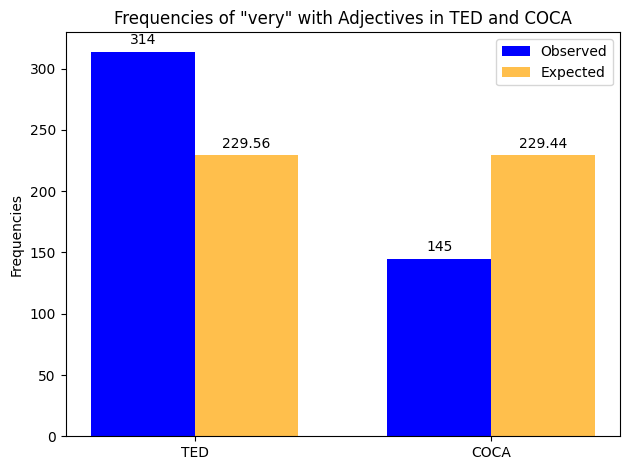

In [22]:
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk import pos_tag, word_tokenize
from scipy.stats import chi2_contingency

# Download NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

def download_csv(url):
    """Download a CSV file from a given URL and return it as a pandas DataFrame, with text converted to lowercase."""
    response = requests.get(url)
    if response.status_code == 200:
        csv_raw = StringIO(response.text)
        df = pd.read_csv(csv_raw)
        df = df.applymap(lambda s: s.lower() if type(s) is str else s)
        return df
    else:
        raise Exception(f"Failed to download CSV. Status code: {response.status_code}")

def count_pattern(df, word, first_tag, second_tag):
    """Count occurrences of a specified word followed by a word with a specific tag in a DataFrame."""
    total_count = 0
    for text in df.fillna('').astype(str).apply(lambda x: ' '.join(x), axis=1):
        tokens = word_tokenize(text)
        tagged = pos_tag(tokens)
        for i in range(len(tagged) - 1):
            if tagged[i][0] == word and tagged[i + 1][1] == second_tag:
                total_count += 1
    return total_count

# URLs of the CSV files
ted_csv_url = 'https://github.com/Englishson0909/S24Corpus-final/raw/main/TEDcleandata.csv'
coca_csv_url = 'https://github.com/Englishson0909/S24Corpus-final/raw/main/finalcocatext.csv'

try:
    df_ted = download_csv(ted_csv_url)
    df_coca = download_csv(coca_csv_url)

    # Count "very" as an intensifier with adjectives
    very_with_adj_ted = count_pattern(df_ted, 'very', 'RB', 'JJ')
    very_with_adj_coca = count_pattern(df_coca, 'very', 'RB', 'JJ')

    # Total words in each dataset
    total_words_ted = sum([len(word_tokenize(text)) for text in df_ted.fillna('').astype(str).apply(lambda x: ' '.join(x), axis=1)])
    total_words_coca = sum([len(word_tokenize(text)) for text in df_coca.fillna('').astype(str).apply(lambda x: ' '.join(x), axis=1)])

    # Prepare contingency table for chi-squared tests
    contingency_table = [[very_with_adj_ted, total_words_ted - very_with_adj_ted],
                         [very_with_adj_coca, total_words_coca - very_with_adj_coca]]

    # Perform chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Print results
    print("Chi-Squared Test Results for 'Very' with Adjectives:")
    print(f"Chi-square statistic: {chi2}, P-value: {p}, Degrees of freedom: {dof}")
    print("Expected frequencies:")
    print(expected)

    # Data for plotting
    labels = ['TED', 'COCA']
    observed_counts = [very_with_adj_ted, very_with_adj_coca]
    expected_counts = [expected[0][0], expected[1][0]]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, observed_counts, width, label='Observed', color='blue')
    rects2 = ax.bar(x + width/2, expected_counts, width, label='Expected', color='orange', alpha=0.7)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Frequencies')
    ax.set_title('Frequencies of "very" with Adjectives in TED and COCA')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")
